In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
os.chdir(r"C:\Users\kalis\Downloads\Sales Data")

In [22]:
path = os.chdir(r"C:\Users\kalis\Downloads\Sales Data")
files = [i for i in os.listdir(path) if not i.startswith('.')]

df = pd.DataFrame()

for i in files:
    current_df = pd.read_csv(i)
    df = pd.concat([df,current_df])
df.to_csv("all_data.csv",index=False)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [23]:
df.shape

(186850, 6)

In [24]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [25]:
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.dropna(how="all",inplace=True)
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [27]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [28]:
df1 = df.copy(deep=True)

In [45]:
df = df[df['Order Date'].str[:2]!="Or"]

In [49]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format='%m/%d/%y %H:%M')

In [55]:
df['Time'] = df['Order Date'].dt.time
df['Date'] = df['Order Date'].dt.date

In [57]:
df.drop(columns=['time','date'],inplace=True)

In [61]:
df['Date'] = pd.to_datetime(df['Date'])

In [71]:
df['month']=df['Date'].dt.month

In [73]:
df.drop(columns="Order Date",inplace=True)

In [74]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Time,Date,month
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",08:46:00,2019-04-19,4
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",22:30:00,2019-04-07,4
3,176560,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001",14:38:00,2019-04-12,4
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",14:38:00,2019-04-12,4
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",09:27:00,2019-04-30,4


In [113]:
df['Purchase Address'].str.split(",").str[2].str.strip().str.split(" ").str[0]

0        TX
2        MA
3        CA
4        CA
5        CA
         ..
11681    CA
11682    CA
11683    CA
11684    CA
11685    CA
Name: Purchase Address, Length: 185950, dtype: object

In [105]:
df['Purchase Address'].str.split(",").str[1].str.strip()

0               Dallas
2               Boston
3          Los Angeles
4          Los Angeles
5          Los Angeles
             ...      
11681      Los Angeles
11682    San Francisco
11683    San Francisco
11684    San Francisco
11685    San Francisco
Name: Purchase Address, Length: 185950, dtype: object

In [115]:
df['city']=df['Purchase Address'].str.split(",").str[1].str.strip() + "(" + df['Purchase Address'].str.split(",").str[2].str.strip().str.split(" ").str[0] + ")"

In [116]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Time,Date,month,city
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",08:46:00,2019-04-19,4,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",22:30:00,2019-04-07,4,Boston(MA)
3,176560,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001",14:38:00,2019-04-12,4,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",14:38:00,2019-04-12,4,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",09:27:00,2019-04-30,4,Los Angeles(CA)


In [118]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Quantity Ordered'].dtype

dtype('int64')

In [120]:
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Price Each'].dtype

dtype('float64')

In [121]:
df['sales'] = df['Quantity Ordered'] * df['Price Each']

In [122]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Time,Date,month,city,sales
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",08:46:00,2019-04-19,4,Dallas(TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",22:30:00,2019-04-07,4,Boston(MA),99.99
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",14:38:00,2019-04-12,4,Los Angeles(CA),600.00
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",14:38:00,2019-04-12,4,Los Angeles(CA),11.99
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",09:27:00,2019-04-30,4,Los Angeles(CA),11.99


In [125]:
df['month_name']=df['Date'].dt.month_name()

In [129]:
df.groupby(['month_name'])[['Quantity Ordered','sales']].sum()

,Quantity Ordered,sales
month_name,,
April,20558,3390670.24
August,13448,2244467.88
December,28114,4613443.34
February,13449,2202022.42
January,10903,1822256.73
July,16072,2647775.76
June,15253,2577802.26
March,17005,2807100.38
May,18667,3152606.75


In [131]:
monthly_sales = df.groupby('month_name')['sales'].sum()

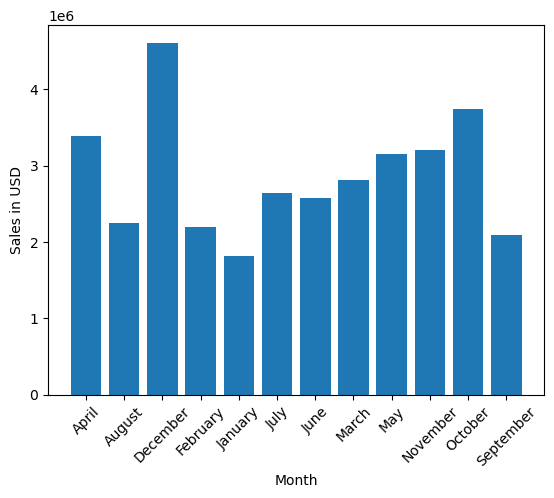

In [134]:
plt.bar(monthly_sales.index,monthly_sales.values)
plt.ylabel("Sales in USD")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

In [138]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Purchase Address', 'Time', 'Date', 'month', 'city', 'sales',
       'month_name'],
      dtype='object')

In [141]:
df.groupby(['city'])[['Quantity Ordered','sales']].sum()

,Quantity Ordered,sales
city,,
Atlanta(GA),16602,2795498.58
Austin(TX),11153,1819581.75
Boston(MA),22528,3661642.01
Dallas(TX),16730,2767975.40
Los Angeles(CA),33289,5452570.80
New York City(NY),27932,4664317.43
Portland(ME),2750,449758.27
Portland(OR),11303,1870732.34
San Francisco(CA),50239,8262203.91


In [149]:
df.groupby(['city'])['sales'].sum()

city
Atlanta(GA)          2795498.58
Austin(TX)           1819581.75
Boston(MA)           3661642.01
Dallas(TX)           2767975.40
Los Angeles(CA)      5452570.80
New York City(NY)    4664317.43
Portland(ME)          449758.27
Portland(OR)         1870732.34
San Francisco(CA)    8262203.91
Seattle(WA)          2747755.48
Name: sales, dtype: float64

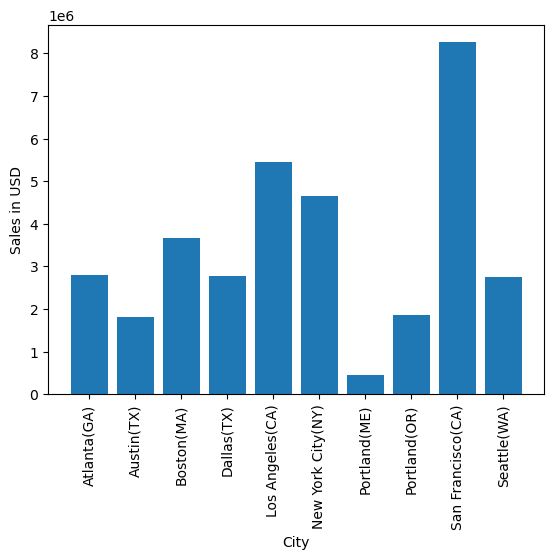

In [151]:
city_sales = df.groupby(['city'])['sales'].sum()

plt.bar(city_sales.index,city_sales.values)
plt.ylabel("Sales in USD")
plt.xlabel("City")
plt.xticks(rotation="vertical")
plt.show()

In [154]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Purchase Address', 'Time', 'Date', 'month', 'city', 'sales',
       'month_name'],
      dtype='object')

In [157]:
df.groupby('Time')['sales'].sum().reset_index()

,Time,sales
0,00:00:00,22488.86
1,00:01:00,12814.95
2,00:02:00,12951.64
3,00:03:00,18759.14
4,00:04:00,16960.08
...,...,...
1435,23:55:00,17294.89
1436,23:56:00,19463.40
1437,23:57:00,16237.62
1438,23:58:00,19606.93


In [170]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Time,Date,month,city,sales,month_name
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",08:46:00,2019-04-19,4,Dallas(TX),23.90,April
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",22:30:00,2019-04-07,4,Boston(MA),99.99,April
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",14:38:00,2019-04-12,4,Los Angeles(CA),600.00,April
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",14:38:00,2019-04-12,4,Los Angeles(CA),11.99,April
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",09:27:00,2019-04-30,4,Los Angeles(CA),11.99,April


In [178]:
group_df = df[df['Order ID'].duplicated(keep=False)]
group_df.shape

(14649, 11)

In [182]:
group_df['grouped'] = group_df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

C:\Users\kalis\AppData\Local\Temp\ipykernel_11600\1329964840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df['grouped'] = group_df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


In [186]:
df2 = group_df[['Order ID','grouped']].drop_duplicates()
df2.shape

(7136, 2)

In [187]:
from itertools import combinations
from collections import Counter

In [189]:
count = Counter()

for i in df2['grouped']:
    row_list = i.split(',')
    count.update(Counter(combinations(row_list,2)))

for i,j in count.most_common(10):
    print(i,j)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [195]:
most_soled_products = df.groupby('Product')['Quantity Ordered'].sum().reset_index().sort_values(by='Quantity Ordered',ascending=False)

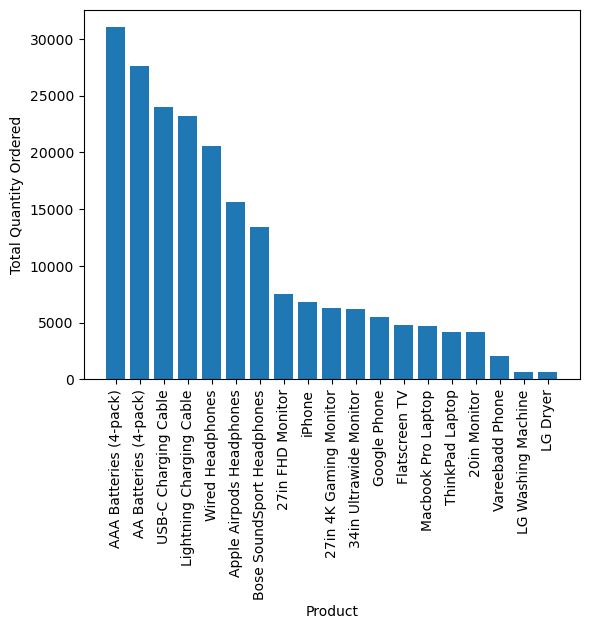

In [200]:
plt.bar(most_soled_products['Product'],most_soled_products['Quantity Ordered'])
plt.xlabel('Product')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=90)
plt.show()

In [206]:
prices = df.groupby('Product')['Price Each'].mean().reset_index()

In [210]:
prices

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


C:\Users\kalis\AppData\Local\Temp\ipykernel_11600\1014053113.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(most_soled_products['Product'],rotation=90)


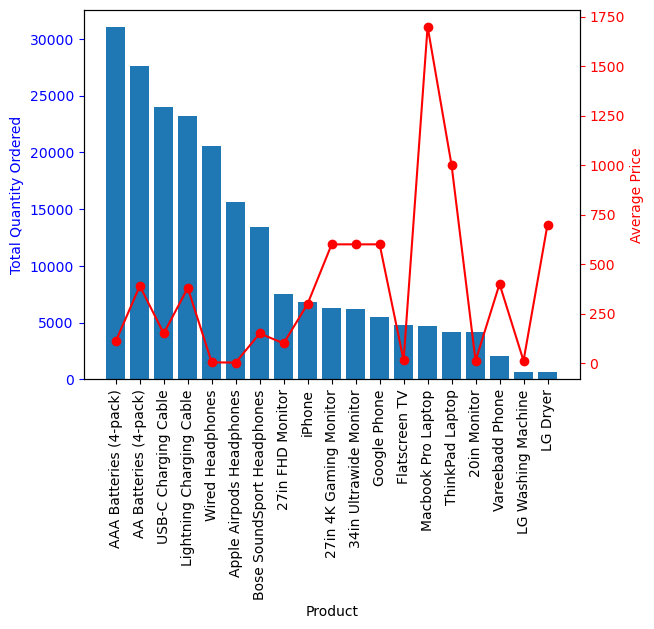

In [211]:
fig, ax1 = plt.subplots()

ax1.bar(most_soled_products['Product'].tolist(),most_soled_products['Quantity Ordered'].tolist())
ax1.set_xlabel('Product')
ax1.set_ylabel('Total Quantity Ordered', color= 'b')
ax1.tick_params('y',colors='b')
ax1.set_xticklabels(most_soled_products['Product'],rotation=90)

ax2 = ax1.twinx()

ax2.plot(most_soled_products['Product'].tolist(),prices['Price Each'].tolist(), color='r', marker='o')
ax2.set_ylabel('Average Price',color='r')
ax2.tick_params('y', colors='r')

plt.show()